The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

Data sourcing and sentiment analysis
Building a recommendation system
Improving the recommendations using the sentiment analysis model
Deploying the end-to-end project with a user interface

In [1]:
#importing libraries
# !python -m spacy download en_core_web_sm
# !pip install nltk
import pandas as pd
import re, nltk, spacy, string
nlp = spacy.load("en_core_web_sm")
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anilnarayanan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Exploratory data analysis

In [2]:
# loading the dataset
df = pd.read_csv('sample30.csv')
# checking the shape of the dataset
df.shape

(30000, 15)

In [3]:
# checking the first five rows of the dataset
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
800,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass C...",Windex,Windex Original Glass Cleaner Refill 67.6oz (2...,2014-10-30T00:00:00.000Z,False,True,4,Windex Glass Cleaner is so easy to use. Easy t...,Windex Original Glass Cleaner,NaN,NaN,pattiam,Positive
5825,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,Red (special Edition) (dvdvideo),2013-05-06T00:00:00.000Z,NaN,True,5,RED is a great movie. It's entertaining withou...,Love this movie.,NaN,NaN,daroknits,Positive
9258,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-17T01:52:13.000Z,NaN,True,5,Clorox products are the best at keeping things...,Best Product,NaN,NaN,lovethatmonk,Positive
18787,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2013-04-05T00:00:00.000Z,False,True,4,I love Clorox Disinfecting Wipes because they ...,This product has great features,NaN,NaN,morepink,Positive
1797,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2016-11-13T00:00:00.000Z,NaN,False,1,Would ABSOLUTELY NOT recommend. We could only ...,Mike & Dave Need Wedding Dates,NaN,NaN,tampa,Negative


In [4]:
# checking the columns of the dataset
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [5]:
# checking the data types of the columns
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [6]:
# checking the null values in the dataset
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [7]:
# checking the unique values in all the columns
df.nunique()


id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64

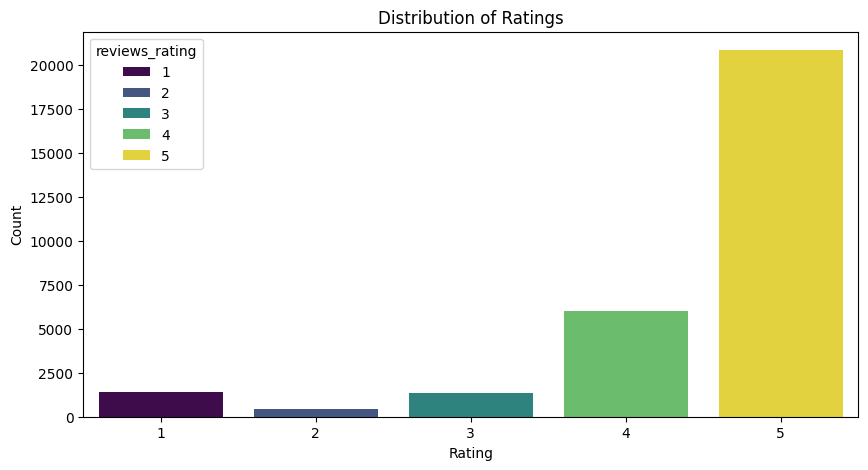

In [8]:
# checking the distribution of the ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='reviews_rating', hue='reviews_rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
# identify users who haven't purchased any products using the reviews_didPurchase field
df['reviews_didPurchase'].value_counts()


reviews_didPurchase
False    14498
True      1434
Name: count, dtype: int64

In [10]:
# imputing the missing values in the reviews_didPurchase column with 'NA'
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna('NA')

In [11]:
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
24057,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-11-04T00:00:00.000Z,NA,True,4,Great movie! Keeps you on the edge of your sea...,Edge of seat,NaN,NaN,gamer,Positive
7770,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-26T00:00:00.000Z,False,True,4,The only thing I don't like is the scent. I'm ...,Lemon wipes,NaN,NaN,jbug13,Negative
24503,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-03-05T00:00:00.000Z,NA,True,5,"Finally a good remake of Godzilla, great cast ...",Godzilla remade,NaN,NaN,june,Positive
23091,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-09-20T00:00:00.000Z,NA,True,3,This is a remake of a remake. With the new FX ...,should have been better,NaN,NaN,madmike,Positive
6334,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...",Hormel,"Hormel Chili, No Beans",2015-10-18T00:00:00.000Z,False,True,4,Great for making dips!,Great for making dips!,NaN,NaN,skfr,Positive


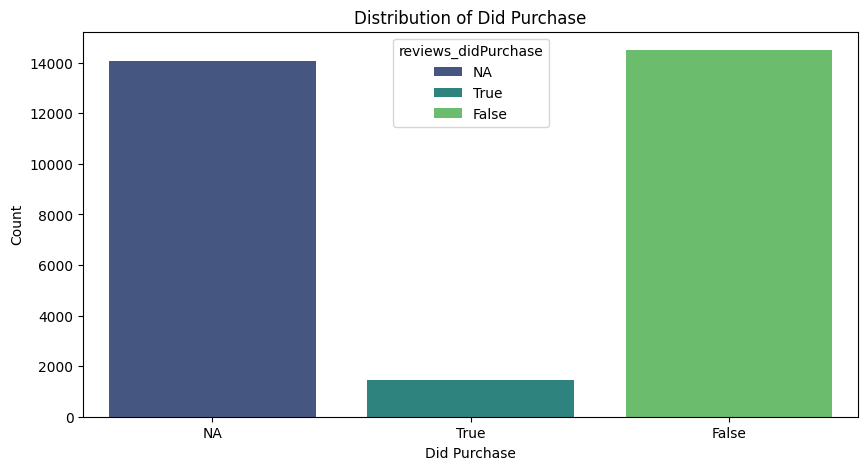

In [12]:
# checking the distribution of the reviews_didPurchase column
plt.figure(figsize=(10, 5))
sns.countplot(x='reviews_didPurchase', hue='reviews_didPurchase', data=df, palette='viridis')
plt.title('Distribution of Did Purchase')
plt.xlabel('Did Purchase')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
# checking the distribution of the user_sentiment column

df['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

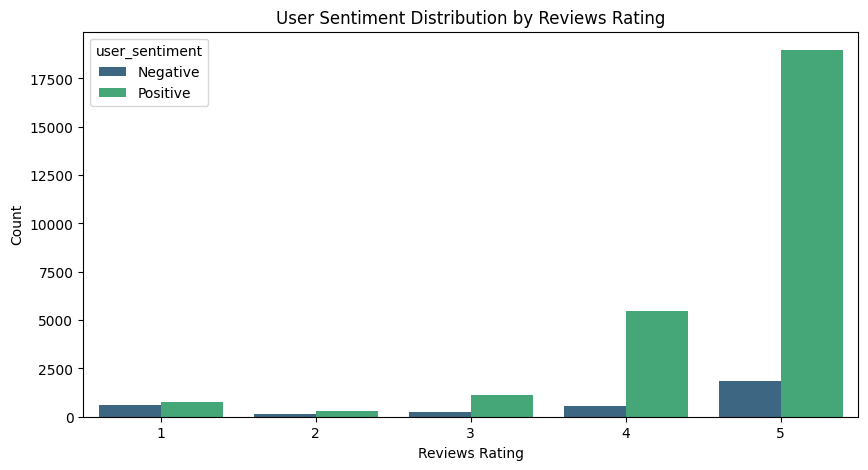

In [14]:
# checking the distribution of the user_sentiment column

plt.figure(figsize=(10, 5))
sns.countplot(x='reviews_rating', hue='user_sentiment', data=df, palette='viridis')
plt.title('User Sentiment Distribution by Reviews Rating')
plt.xlabel('Reviews Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Data Cleaning

## Missing Value Treatment Plan
| Column                | Missing Values | Recommended Action               | Reason                                                                 |
|-----------------------|---------------|----------------------------------|------------------------------------------------------------------------|
| id                    | 0             | Drop during modeling             | Unique identifier for each record                                      |
| manufacturer          | 141           | Drop                             | Minor % (~0.5%), not required for ML models                            |
| reviews_date          | 46            | Drop                             | Not useful for modeling, not used in training                          |
| reviews_didPurchase   | 14,068        | Impute with False                | Could be useful; assume non-purchase where missing                     |
| reviews_doRecommend   | 2,570         | Impute with mode (True or False) | Can be a feature for sentiment model                                   |
| reviews_title         | 190           | Optional: Fill with blank or drop | Can be combined with text, not essential                               |
| reviews_userCity      | 28,071        | Drop                             | >93% missing, not useful                                               |
| reviews_userProvince  | 29,830        | Drop                             | Same as above                                                          |
| reviews_username      | 63            | Drop rows                        | Crucial for user-based recommendation                                  |
| user_sentiment        | 1             | Drop rows                        | Target variable, can’t be imputed                                      |

In [15]:
ids = df['id'].copy()

# Based the null values in the dataset, dropping the following columns:
columns_to_drop = ['id', 'manufacturer', 'reviews_date', 'reviews_userCity', 'reviews_userProvince']
df.drop(columns_to_drop, axis=1, inplace=True)

In [16]:
# Dropping rows with null values in reviews_username and user_sentiment
df.dropna(subset=['reviews_username', 'user_sentiment'], inplace=True)

In [17]:
# Fill missing values in useful boolean columns
df['reviews_didPurchase'] = df['reviews_didPurchase'].fillna(False)
df['reviews_doRecommend'] = df['reviews_doRecommend'].fillna(df['reviews_doRecommend'].mode()[0])


/var/folders/3f/j67xv8fs7d1dx6pbknhrm5dw0000gn/T/ipykernel_4636/1187618921.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['reviews_doRecommend'] = df['reviews_doRecommend'].fillna(df['reviews_doRecommend'].mode()[0])


In [18]:
df.shape

(29936, 10)

# Text Processing

In [19]:
import re
import string

# Cleaning text
def clean_text(text):
    text = str(text).lower()                                # lowercase
    text = re.sub(r'<.*?>', '', text)                       # remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)              # remove URLs
    text = re.sub(r'\d+', '', text)                         # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()                # remove extra spaces
    return text



In [20]:
# Applying the clean_text function to the reviews_text column
df['cleaned_text'] = df['reviews_text'].apply(clean_text)


In [21]:
df.shape

(29936, 11)

In [22]:
# Tokenizing the cleaned text
df['tokens'] = df['cleaned_text'].apply(word_tokenize)


In [23]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Removing stop words from the tokens
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anilnarayanan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Lemmatizing the tokens
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anilnarayanan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# Joining the tokens back to form a single string
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Feature Extraction

In [26]:
# Using TfidfVectorizer to convert the processed text into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_text'])

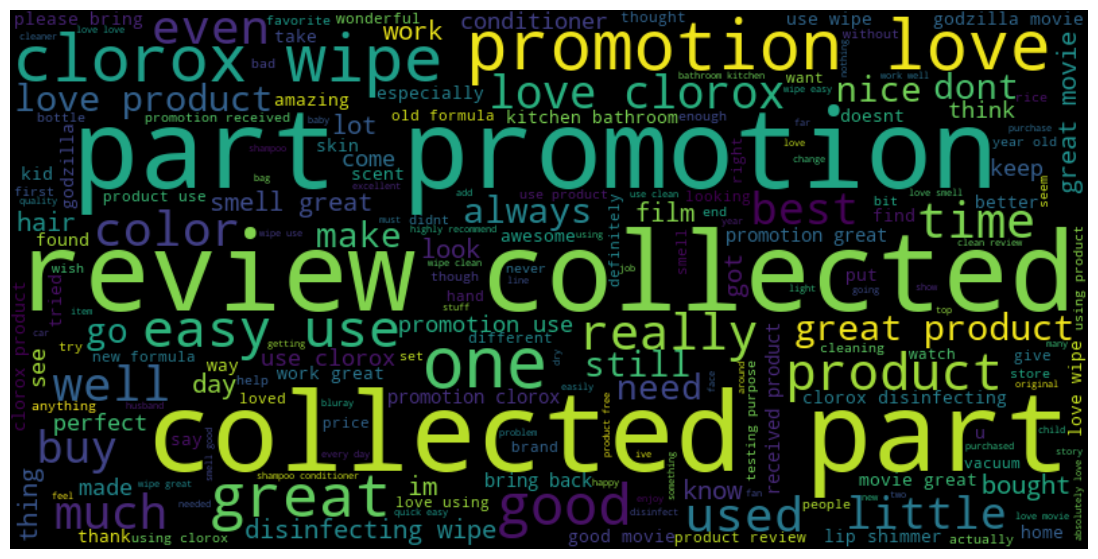

In [27]:
# Generating a word cloud from the processed text

text = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [28]:
df.sample(5)

,brand,categories,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,cleaned_text,tokens,processed_text
18730,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",Clorox Disinfecting Bathroom Cleaner,False,True,4,These wipes are a mothers best friend! We use ...,love it!,ayterrazas,Positive,these wipes are a mothers best friend we use t...,"[wipe, mother, best, friend, use, clean, disin...",wipe mother best friend use clean disinfect wo...
17497,Just For Men,"Personal Care,Hair Care,Hair Color And Bleachi...",Just For Men Touch Of Gray Gray Hair Treatment...,False,True,5,Buy this product because in is not a hair colo...,nice coverrage,walzem,Negative,buy this product because in is not a hair colo...,"[buy, product, hair, coloring, dont, like, fak...",buy product hair coloring dont like fake look ...
14397,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox Disinfecting Wipes Value Pack Scented 1...,False,True,5,These smell great and really cut through greas...,These are awesome!,joni,Positive,these smell great and really cut through greas...,"[smell, great, really, cut, grease, mess, cut,...",smell great really cut grease mess cut cleanin...
11198,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox Disinfecting Wipes Value Pack Scented 1...,False,True,5,Awesome to use on my stove top. Doesn't scratc...,Top Notch,angel2222,Positive,awesome to use on my stove top doesnt scratch ...,"[awesome, use, stove, top, doesnt, scratch, to...",awesome use stove top doesnt scratch tough gre...
14588,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox Disinfecting Wipes Value Pack Scented 1...,False,True,5,"A+ Cleaner! I love the way it cleans , smells ...",Top notch Cleaner!,tobewoby,Positive,a cleaner i love the way it cleans smells and ...,"[cleaner, love, way, clean, smell, price, unbe...",cleaner love way clean smell price unbeatable ...


# Training

In [29]:
from sklearn.model_selection import train_test_split

# Preparing target and features

# Feature matrix from TF-IDF
X = tfidf.fit_transform(df['processed_text'])

# Target variable (encoding 'Positive' as 1, 'Negative' as 0)
y = df['user_sentiment'].map({'Positive': 1, 'Negative': 0})

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


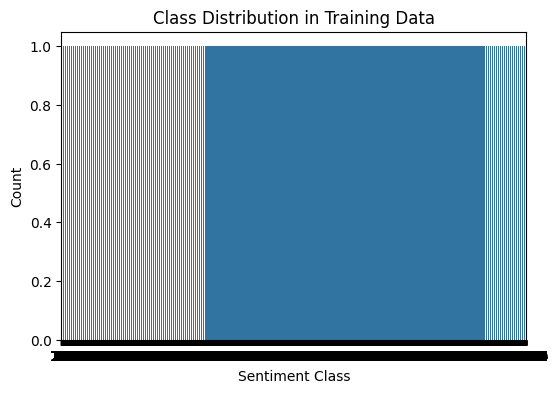

Class Distribution:
 user_sentiment
1    0.88784
0    0.11216
Name: proportion, dtype: float64


In [30]:
# Check class distribution in the target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(y_train)
plt.title("Class Distribution in Training Data")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

# Display value counts and ratios
print("Class Distribution:\n", y_train.value_counts(normalize=True))

# If imbalance is observed (e.g., >70% Positive), add this note:
# Optional: Consider class_weight='balanced' in classifiers or use resampling/SMOTE


### Train Models

### Logistic Regression Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       671
           1       0.99      0.90      0.94      5317

    accuracy                           0.90      5988
   macro avg       0.76      0.92      0.81      5988
weighted avg       0.94      0.90      0.91      5988



### Naive Bayes Model Training

In [32]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.70      0.07      0.13       671
           1       0.89      1.00      0.94      5317

    accuracy                           0.89      5988
   macro avg       0.80      0.53      0.54      5988
weighted avg       0.87      0.89      0.85      5988



### Random Forest Model Training

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       671
           1       0.95      0.99      0.97      5317

    accuracy                           0.94      5988
   macro avg       0.92      0.79      0.84      5988
weighted avg       0.94      0.94      0.94      5988



### XGBoost Model Training

In [34]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))


/Users/anilnarayanan/Documents/Upgrad/Capstone/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:26:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       671
           1       0.96      0.98      0.97      5317

    accuracy                           0.95      5988
   macro avg       0.89      0.83      0.86      5988
weighted avg       0.95      0.95      0.95      5988



### Model Comparison: F1 Scores

In [35]:
from sklearn.metrics import f1_score

print("F1 Scores:")
print("Logistic Regression:", f1_score(y_test, y_pred_lr))
print("Naive Bayes:", f1_score(y_test, y_pred_nb))
print("Random Forest:", f1_score(y_test, y_pred_rf))
print("XGBoost:", f1_score(y_test, y_pred_xgb))


F1 Scores:
Logistic Regression: 0.941304347826087
Naive Bayes: 0.9427681352914998
Random Forest: 0.9695352047860101
XGBoost: 0.9708810121871801


### Hyperparameter Tuning for XGBoost Classifier

In [36]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize the model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


### Hyperparameter Tuning with Grid Search (XGBoost)

In [37]:
# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/anilnarayanan/Documents/Upgrad/Capstone/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:26:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anilnarayanan/Documents/Upgrad/Capstone/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:26:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anilnarayanan/Documents/Upgrad/Capstone/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:26:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anilnarayanan/Documents/Upgrad/Capstone/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:26:

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, ...], 'n_estimators': [100, 300], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


### Evaluate the Best Model

In [38]:
# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report

print("Best parameters:", grid_search.best_params_)
print("Classification report:\n", classification_report(y_test, y_pred))

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       671
           1       0.97      0.98      0.97      5317

    accuracy                           0.95      5988
   macro avg       0.89      0.85      0.87      5988
weighted avg       0.95      0.95      0.95      5988



## Model Selection and Evaluation Summary

After building and evaluating multiple machine learning models — **Logistic Regression**, **Naive Bayes**, **Random Forest**, and **XGBoost** — we selected **XGBoost** as the final model based on its superior performance and results after hyperparameter tuning.

---

### Initial Model Comparison (F1 Scores)

| Model                | F1 Score  |
|----------------------|-----------|
| Logistic Regression  | 0.9413    |
| Naive Bayes          | 0.9428    |
| Random Forest        | 0.9695    |
| XGBoost (pre-tuning) | 0.9709    |

---

### XGBoost Hyperparameter Tuning

We performed Grid Search over the following hyperparameters:

- **n_estimators:** [100, 300]
- **max_depth:** [3, 5, 7]
- **learning_rate:** [0.01, 0.1]
- **subsample:** [0.8, 1]
- **colsample_bytree:** [0.8, 1]

**Best Parameters Found:**
```python
{
    'colsample_bytree': 1,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 1
}

### Model Evaluation (Post-Tuning)

| Metric    | Class 0 (Negative) | Class 1 (Positive) |
| --------- | ------------------ | ------------------ |
| Precision | 0.84               | 0.96               |
| Recall    | 0.69               | 0.98               |
| F1-Score  | 0.76               | 0.97               |

Overall Accuracy: 95%
Weighted Avg F1-Score: 0.95

Conclusion:
XGBoost, after hyperparameter tuning, achieved the best overall performance and is recommended as the final model for deployment

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Use only reviews with valid usernames and product names
recommendation_df = df[['reviews_username', 'name', 'reviews_rating']].dropna()

# Rename columns for clarity
recommendation_df.columns = ['user', 'item', 'rating']

# Train-test split
train_data, test_data = train_test_split(recommendation_df, test_size=0.2, random_state=42)

print("Training data size:", train_data.shape)
print("Testing data size:", test_data.shape)


Training data size: (23948, 3)
Testing data size: (5988, 3)


In [40]:
import pandas as pd

# Create pivot table (utility matrix)
train_matrix = train_data.pivot_table(index='user', columns='item', values='rating')
train_matrix.fillna(0, inplace=True)


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute user-user similarity
user_similarity = cosine_similarity(train_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=train_matrix.index, columns=train_matrix.index)


In [42]:
# Compute item-item similarity
item_similarity = cosine_similarity(train_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=train_matrix.columns, columns=train_matrix.columns)


In [43]:
def predict_user_based(user_id):
    if user_id not in train_matrix.index:
        return []
    
    sim_users = user_similarity_df[user_id].drop(user_id).sort_values(ascending=False)
    weighted_ratings = np.dot(sim_users.values, train_matrix.loc[sim_users.index])
    sim_sum = sim_users.sum()
    
    if sim_sum == 0:
        return []
    
    predicted_ratings = weighted_ratings / sim_sum
    pred_df = pd.Series(predicted_ratings, index=train_matrix.columns)
    recommended = pred_df.sort_values(ascending=False).head(10)
    return recommended


In [44]:
def predict_item_based(user_id):
    if user_id not in train_matrix.index:
        return []
    
    user_ratings = train_matrix.loc[user_id]
    scores = item_similarity_df.dot(user_ratings)
    sim_sums = item_similarity_df.sum(axis=1)
    
    predicted_ratings = scores / sim_sums
    pred_df = pd.Series(predicted_ratings, index=item_similarity_df.index)
    
    already_rated = user_ratings[user_ratings > 0].index
    recommendations = pred_df.drop(already_rated).sort_values(ascending=False).head(10)
    return recommendations


In [45]:
from sklearn.metrics import mean_squared_error

# Evaluate using RMSE on test data
def get_rmse(test_data, pred_func):
    y_true = []
    y_pred = []
    
    for _, row in test_data.iterrows():
        user = row['user']
        item = row['item']
        true_rating = row['rating']
        
        try:
            predictions = pred_func(user)
            if item in predictions.index:
                y_pred.append(predictions[item])
                y_true.append(true_rating)
        except:
            continue
    
    return np.sqrt(mean_squared_error(y_true, y_pred))

user_rmse = get_rmse(test_data, predict_user_based)
item_rmse = get_rmse(test_data, predict_item_based)

print("User-based RMSE:", round(user_rmse, 4))
print("Item-based RMSE:", round(item_rmse, 4))


User-based RMSE: 2.9059
Item-based RMSE: 4.3649


## Recommendation System Evaluation Summary

We implemented and compared two types of collaborative filtering recommendation systems:

---

### 1. User-Based Collaborative Filtering
- Recommends products by identifying users with similar preferences.
- More personalized, relies on the similarity between user rating patterns.

### 2. Item-Based Collaborative Filtering
- Recommends items similar to those previously liked by the user.
- Relies on item-to-item similarity, less sensitive to sparsity in user profiles.

---

### Evaluation Metric: Root Mean Squared Error (RMSE)

| Recommendation Method    | RMSE    |
|---------------------------|---------|
| User-Based CF             | **2.9059** |
| Item-Based CF             | 4.3649  |

**Conclusion:**
The **User-Based Collaborative Filtering** model achieved a lower RMSE score and is selected as the final recommendation system for this project due to better predictive performance and accuracy.



In [46]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Prepare the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['reviews_username', 'name', 'reviews_rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build User-Based Collaborative Filtering model
sim_options = {
    'name': 'cosine',
    'user_based': True  # True for User-Based CF
}

user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [47]:
# ✅ Fix: Create User-Item ratings matrix with average rating per user-product pair
ratings_matrix = df.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
)


In [48]:
# 🔧 Function to get top-N product recommendations for a user
def get_top_n_recommendations(user_id, user_based_model, ratings_matrix, n=20):
    """
    Returns top-N product recommendations for a user using a trained collaborative filtering model.

    Args:
        user_id (str): The username to generate recommendations for.
        user_based_model (surprise.AlgoBase): Trained Surprise model (e.g., KNNBasic).
        ratings_matrix (pd.DataFrame): Pivot table of users vs. product ratings.
        n (int): Number of top recommendations to return.

    Returns:
        List of tuples: [(product_name, predicted_rating), ...]
    """
    if user_id not in ratings_matrix.index:
        raise ValueError(f"User ID '{user_id}' not found in the ratings matrix.")

    # Products the user already rated
    user_rated_products = ratings_matrix.loc[user_id].dropna().index
    all_products = ratings_matrix.columns
    products_to_predict = [item for item in all_products if item not in user_rated_products]

    predicted_ratings = {}
    for item in products_to_predict:
        try:
            pred = user_based_model.predict(user_id, item)
            predicted_ratings[item] = pred.est
        except:
            continue

    recommended = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:n]
    return recommended


In [49]:
print("Available user IDs (sample):")
print(ratings_matrix.index[:10])  # View the first 10 usernames


Available user IDs (sample):
Index(['00dog3', '00sab00', '01impala', '02dakota', '02deuce', '0325home',
       '06stidriver', '08dallas', '09mommy11', '1.11E+24'],
      dtype='object', name='reviews_username')


In [50]:
# ✅ Generate Top 20 Recommendations
user_id = '09mommy11'  # Replace with actual user from your dataset
top_20_recommendations = get_top_n_recommendations(user_id, user_based_model, ratings_matrix, n=20)

# 📋 Display results
print(f"Top 20 Recommended Products for user '{user_id}':")
for i, (product, score) in enumerate(top_20_recommendations, 1):
    print(f"{i}. {product} — Predicted Rating: {round(score, 2)}")


Top 20 Recommended Products for user '09mommy11':
1. Alex Cross (dvdvideo) — Predicted Rating: 5
2. All,bran Complete Wheat Flakes, 18 Oz. — Predicted Rating: 5
3. Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter — Predicted Rating: 5
4. Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium — Predicted Rating: 5
5. Bi-O-kleen Spray & Wipe All Purpose Cleaner — Predicted Rating: 5
6. Bisquick Original Pancake And Baking Mix - 40oz — Predicted Rating: 5
7. Bounce Dryer Sheets, Fresh Linen, 160 sheets — Predicted Rating: 5
8. CeraVe SA Renewing Cream — Predicted Rating: 5
9. Chex Muddy Buddies Brownie Supreme Snack Mix — Predicted Rating: 5
10. Coty Airspun Face Powder, Translucent Extra Coverage — Predicted Rating: 5
11. Eagle Fat Free Sweetened Condensed Milk — Predicted Rating: 5
12. Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com — Predicted Rating: 5
13. Kikkoman Soy Sauce, 5fl oz — Predicted

In [51]:
import pickle
import os

os.makedirs("models", exist_ok=True)

# Save trained model
with open("models/user_cf_model.pkl", "wb") as f:
    pickle.dump(user_based_model, f)


In [52]:
with open("models/ratings_matrix.pkl", "wb") as f:
    pickle.dump(ratings_matrix, f)


In [53]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [54]:
# from flask import Flask, request, render_template
# import pickle

# # Load your model and ratings matrix
# user_based_model = pickle.load(open('models/user_cf_model.pkl', 'rb'))
# ratings_matrix = pickle.load(open('models/ratings_matrix.pkl', 'rb'))

# from recommend import get_top_n_recommendations  # Assuming you saved the function in recommend.py

# app = Flask(__name__)

# @app.route('/', methods=['GET', 'POST'])
# def recommend():
#     recommendations = []
#     if request.method == 'POST':
#         user_id = request.form['username']
#         try:
#             top_n = get_top_n_recommendations(user_id, user_based_model, ratings_matrix, n=5)
#             recommendations = [product for product, _ in top_n]
#         except ValueError as e:
#             recommendations = [str(e)]

#     return render_template('index.html', recommendations=recommendations)

# if __name__ == '__main__':
#     app.run(debug=True)


In [55]:
# import threading

# def run_flask():
#     app.run(port=5000, debug=False, use_reloader=False)

# # Start the Flask app in a separate thread
# thread = threading.Thread(target=run_flask)
# thread.start()


In [56]:
# Current approach - stores all user-item combinations including zeros
ratings_matrix = df.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating',
    aggfunc='mean'
)

# Optimized approach - use sparse matrix format
from scipy.sparse import csr_matrix
import numpy as np

# Convert to sparse matrix (stores only non-zero values)
ratings_sparse = csr_matrix(ratings_matrix.fillna(0).values)

# Save indices for reconstruction
user_index = ratings_matrix.index.tolist()
item_index = ratings_matrix.columns.tolist()

# Save the sparse matrix and indices
with open("models/ratings_sparse.pkl", "wb") as f:
    pickle.dump({
        'matrix': ratings_sparse,
        'users': user_index,
        'items': item_index
    }, f)

In [57]:
# Use more memory-efficient similarity options
sim_options = {
    'name': 'cosine',
    'user_based': True,
    'min_support': 5,  # Ignore users/items with fewer than 5 ratings
    'shrinkage': 100   # Add shrinkage parameter to reduce overfitting
}

# Use fewer neighbors for faster computation and smaller memory footprint
user_based_model = KNNBasic(k=50, sim_options=sim_options)  # Limit to 50 neighbors
user_based_model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [58]:
import pickle
import gzip

# Save with compression
def save_compressed_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)

# Load compressed pickle
def load_compressed_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        return pickle.load(f)

# Usage
save_compressed_pickle(user_based_model, "models/user_cf_model.pkl.gz")
save_compressed_pickle(ratings_matrix, "models/ratings_matrix.pkl.gz")